Create one function that allows to estimate the following list of metrics for the unsupervised learning.
[Homogeneity, Completeness, V-measure, Silhouette Coefficient, Variance Ratio Criterion]:
Calculate each metrics
Return the information about clustering
Example:
def evaluation (y_true, y_label):
  score1=metrics.homogeneity_score(y_true, y_label)
  If score1 >=0.7: print (“Model is good”)
Load Iris dataset 
from sklearn import datasets
             iris = datasets.load_iris()
Implement KMeans, DBSCAN and Hierarchical clustering, checking the variants with 2,3,4,5 clusters (where it is possible)
Compare the models using your function
Conclusions?

In [35]:
#calling the libraries
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn import metrics
from yellowbrick.cluster import KElbowVisualizer
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer

In [71]:
#declaring the function to get the metrics from our model
def evaluation (X, labels_true, labels):
    print("Homogeneity: ",  metrics.homogeneity_score(labels_true, labels))
    print("Completeness: ", metrics.completeness_score(labels_true, labels))
    print("V-measure: ", metrics.v_measure_score(labels_true, labels))
    print("Silhouette Coefficient: ", metrics.silhouette_score(X, labels, metric="sqeuclidean"))
    print("Variance Ratio Criterion: ", metrics.calinski_harabasz_score(X, labels))

In [61]:
#loading Iris dataset (numpy array), and converting it to a datafram
data = load_iris()
df = pd.DataFrame(data['data'])
df.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [62]:
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

C:\Users\cleme\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\cleme\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\cleme\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\cleme\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Window

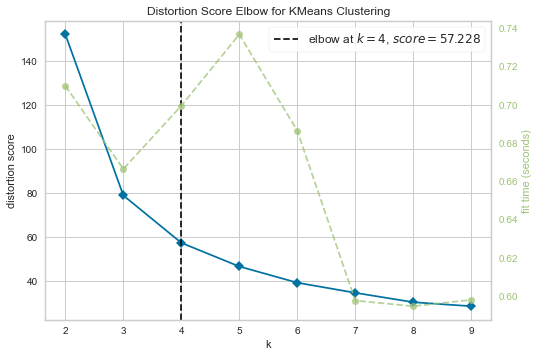

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [75]:
#Using KElbowVisualizer to get the optimal number of cluster for our model (Kmeans) - don't worry about the error warnings
model = KMeans()
visualizer = KElbowVisualizer(estimator = model, k = (2,10))
visualizer.fit(df)
visualizer.poof()

In [65]:
#calling the model and fitting on our dataframe
kmeans = KMeans(n_clusters=4, random_state=0).fit(df)
cluster_centers= kmeans.cluster_centers_
labels = kmeans.labels_

C:\Users\cleme\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [73]:
#calling the function to get our metrics
evaluation (df, data.target, labels)

Homogeneity:  0.8083138423637095
Completeness:  0.6522113355514313
V-measure:  0.721920386782096
Silhouette Coefficient:  0.6713632259850891
Variance Ratio Criterion:  530.7658081872851
